# 🔍 Step 1: Load and Understand the Data (EDA)

Load the data

Inspect the first few rows

Check data types

Look for nulls, unique values, and key columns

Visualize distributions and patterns

# ❓ Step 2: Sample Questions to Ask the Data

Here are 5 useful analytical questions we can explore:

Which borough has the most bus lanes?

What is the distribution of bus lane lengths by borough?

Which types of bus lanes are most common (e.g., curbside, offset)?

Are there patterns in bus lane installation years or time trends?

What are the longest bus lanes and where are they located?

Which borough has the most bus lanes?

What’s the average/total lane length by borough?

What are the top 5 most common lane types?

How has the number of lanes changed over time?

What are the top 5 longest bus lanes and their locations?

# ✅ Step 3: Answering These Questions

Load and clean the data

Begin with exploratory analysis

Answer the questions using visualizations and summaries

# ✅ Dataset Summary (Initial EDA)
Rows: 3,732

Columns: 26

Geometry: Bus lanes represented by MULTILINESTRING geometries.

Key Columns:

Street, Boro, Facility: Location details

Lane_Type1, Lane_Type2: Type of bus lane

Shape_Leng: Lane length (in feet or meters)

Year1, Year2, Year3: Installation or modification years

Lane_Color, Hours, Days: Operational info

# 🧼 Observations
Some nulls in Lane_Type1, Lane_Color, Lane_width

Columns like SBS_Route3 are entirely null and can likely be dropped

Likely we’ll use columns:
Boro, Lane_Type1, Shape_Leng, Street, Year1, Lane_Color

# 🔍 Next Steps

Clean the data a bit (drop unused columns, handle nulls)

Visualize some core distributions:

Count of lanes by borough

Distribution of lane lengths

Frequency of lane types

Trend of installations by year

# 📊 EDA Highlights
Borough-wise Distribution:

Most bus lanes are in Manhattan (MN), followed by Brooklyn (BK) and Bronx (BX).

Lane Lengths:

Most lanes are short (under 500 meters/feet).

A few outliers with significantly higher lengths.

Common Lane Types:

Curbside, Offset, and Median dominate.

Some lanes are labeled Unknown or missing.

Installations Over Time:

A spike in lane installations happened in recent years (2010–2020).

Possibly tied to urban mobility plans or SBS programs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Bus_Lanes_-_Local_Streets_20250409.csv")
df

,the_geom,Street,TrafDir,SegmentID,RW_TYPE,StreetWidt,Boro,Facility,Hours,Days,...,SBS_Route1,SBS_Route2,SBS_Route3,Days_Code,Last_Updat,Lane_Color,Open_dates,Chron_ID_1,Shape_Leng,Shape_Le_1
0,MULTILINESTRING ((-73.96796054798135 40.683726...,FULTON STREET,T,29245,1.0,0,BK,Fulton St (WB),7AM-10AM,Monday-Friday,...,NaN,NaN,NaN,5,2/25/2019,NaN,2/25/2019,BK2018,310.046437,MULTILINESTRING ((993136.0940925032 188378.163...
1,MULTILINESTRING ((-73.96366357791018 40.682806...,FULTON STREET,T,29358,1.0,0,BK,Fulton St (EB),2PM-7PM,Monday-Friday,...,NaN,NaN,NaN,5,2/25/2019,NaN,2/25/2019,BK2018,293.069021,MULTILINESTRING ((994327.9913150072 188043.381...
2,MULTILINESTRING ((-73.97231249591701 40.685458...,FULTON STREET,T,29080,1.0,0,BK,Fulton St (WB),7AM-10AM,Monday-Friday,...,NaN,NaN,NaN,5,2/25/2019,NaN,2/25/2019,BK2018,336.500126,MULTILINESTRING ((991928.8885016739 189008.559...
3,MULTILINESTRING ((-73.97231249591701 40.685458...,FULTON STREET,T,29080,1.0,0,BK,Fulton St (EB),2PM-7PM,Monday-Friday,...,NaN,NaN,NaN,5,2/25/2019,NaN,2/25/2019,BK2018,336.500126,MULTILINESTRING ((991928.8885016739 189008.559...
4,MULTILINESTRING ((-73.97276482719224 40.685641...,FULTON STREET,T,29098,1.0,0,BK,Fulton St (EB),2PM-7PM,Monday-Friday,...,NaN,NaN,NaN,5,2/25/2019,NaN,2/25/2019,BK2018,142.076254,MULTILINESTRING ((991803.4176240116 189075.213...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,MULTILINESTRING ((-73.90446644343753 40.593512...,FLATBUSH AVENUE,A,232430,1.0,36,BK,Flatbush Ave (NB),24 Hours,7 Days/week,...,NaN,NaN,NaN,7,11/25/2019,NaN,11/25/2019,BK2019,1577.121404,MULTILINESTRING ((1010781.9296701103 155523.48...
3728,MULTILINESTRING ((-73.93088430131372 40.848118...,WEST 181 STREET,T,71352,1.0,50,MAN,W 181 St (EB),6am-10pm,7 Days/week,...,NaN,NaN,NaN,5,7/19/2017,NaN,7/19/2017,MAN2011,460.361962,MULTILINESTRING ((1003371.8770985901 248277.58...
3729,MULTILINESTRING ((-73.93373079502821 40.849321...,WEST 181 STREET,T,71124,1.0,50,MAN,W 181 St (EB),6am-10pm,7 Days/week,...,NaN,NaN,NaN,5,7/19/2017,NaN,7/19/2017,MAN2011,390.333633,MULTILINESTRING ((1002584.0213908404 248715.04...
3730,MULTILINESTRING ((-73.93233709023838 40.848735...,WEST 181 STREET,T,71132,1.0,50,MAN,W 181 St (EB),6am-10pm,7 Days/week,...,NaN,NaN,NaN,5,7/19/2017,NaN,7/19/2017,MAN2011,440.796808,MULTILINESTRING ((1002969.7683227509 248501.73...


C:\Users\osama\AppData\Local\Temp\ipykernel_28648\3168050689.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Boro', ax=axes[0, 0], palette='Set2')
C:\Users\osama\AppData\Local\Temp\ipykernel_28648\3168050689.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='Lane_Type1', order=df_clean['Lane_Type1'].value_counts().index,


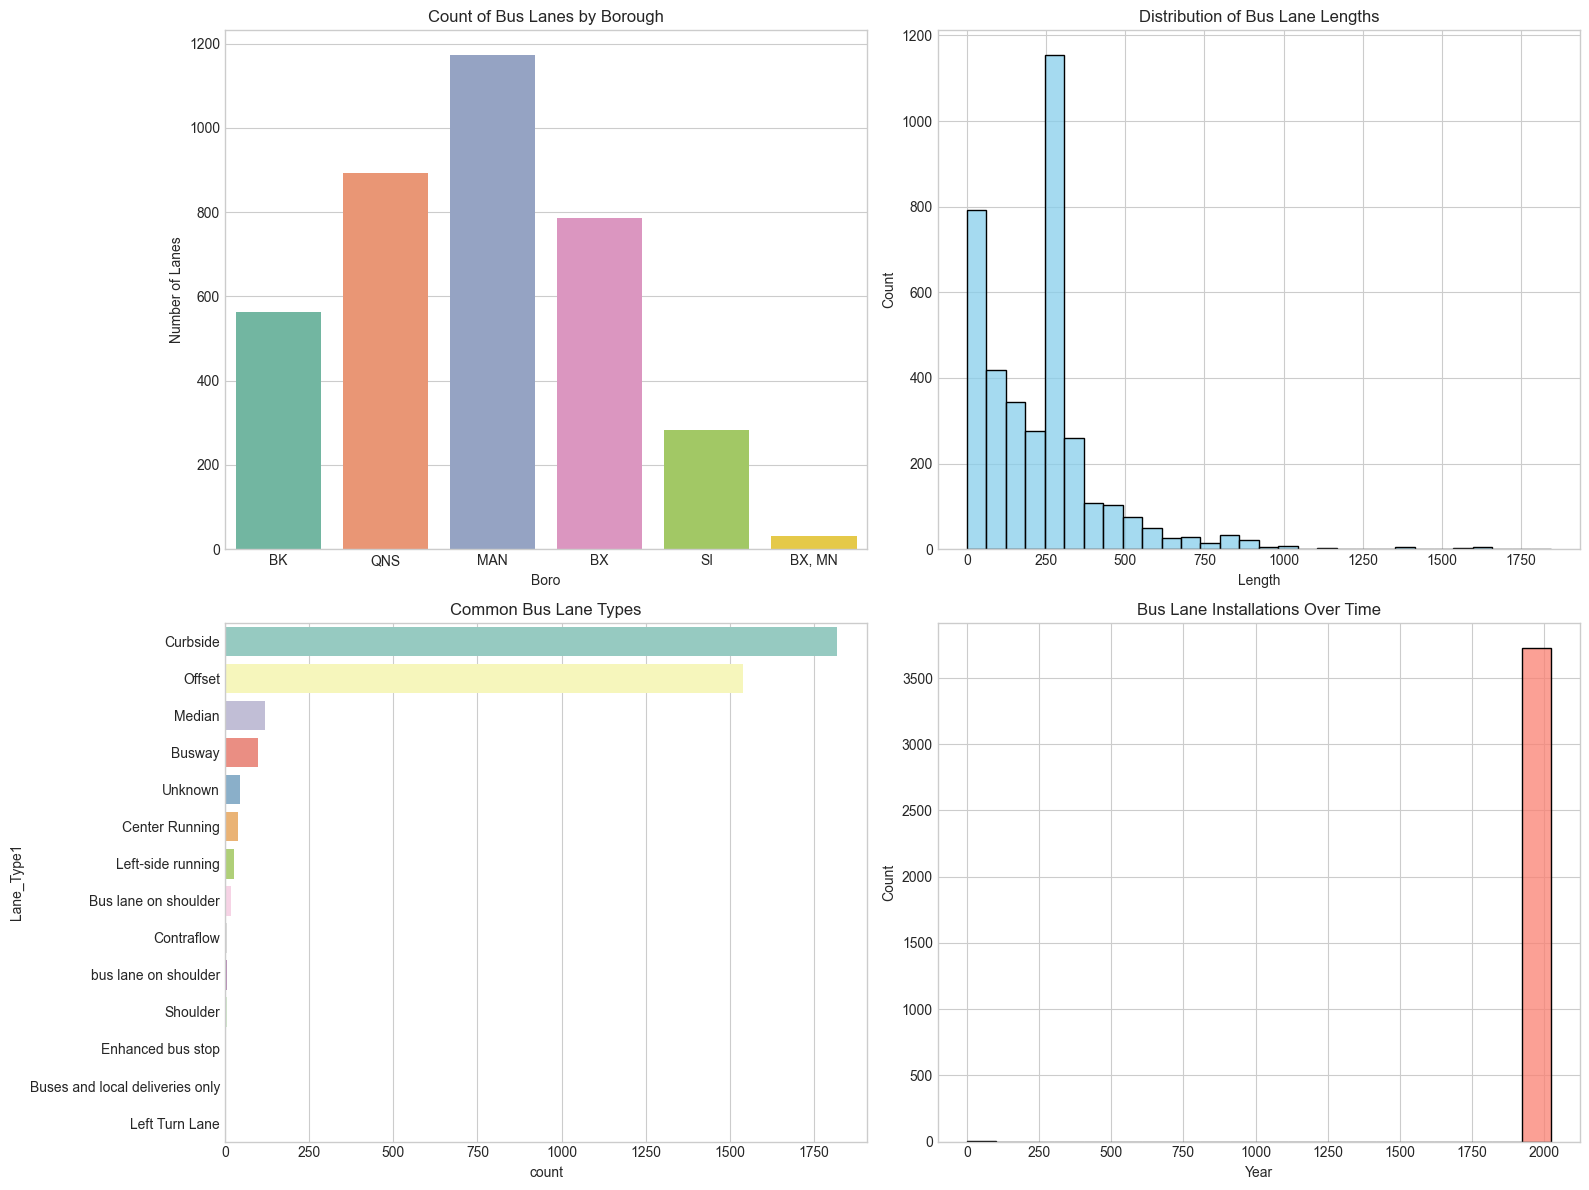

Bus Lanes by Borough:
 Boro
MAN       1173
QNS        894
BX         787
BK         563
SI         284
BX, MN      31
Name: count, dtype: int64

Total and Avg Lane Length by Borough:
         count            sum        mean
Boro                                    
MAN      1173  272772.703128  232.542799
QNS       894  171177.508895  191.473724
BK        563  164990.473579  293.055903
BX        787  161348.056407  205.016590
SI        284   78439.095527  276.193998
BX, MN     31    3092.475012   99.757258

Top 5 Lane Types:
 Lane_Type1
Curbside    1817
Offset      1539
Median       120
Busway        99
Unknown       44
Name: count, dtype: int64

Installations per Year:
 Year1
0         2
1963     34
1969     85
1981     16
1982    519
1983     31
1984     31
1986     45
1988     27
1991     29
1993     28
1996      3
1999      4
2001     43
2002     78
2004     20
2005      4
2007     34
2008     35
2009     28
2010     90
2011     37
2012    123
2013    361
2014     53
2015    271
20

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Bus_Lanes_-_Local_Streets_20250409.csv")
df
# # Drop completely null or mostly useless columns
# df_clean = df.drop(columns=[
#     'SBS_Route3', 'Shape_Le_1', 'the_geom', 'Chron_ID_1', 'RW_TYPE'
# ])

# Fill missing lane type values for now (only for visualizations)
df_clean['Lane_Type1'] = df_clean['Lane_Type1'].fillna('Unknown')
df_clean['Lane_Color'] = df_clean['Lane_Color'].fillna('Unknown')

# ------------- EDA Visualizations -----------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Count of bus lanes by borough
sns.countplot(data=df_clean, x='Boro', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title("Count of Bus Lanes by Borough")
axes[0, 0].set_ylabel("Number of Lanes")

# 2. Distribution of bus lane lengths
sns.histplot(df_clean['Shape_Leng'], bins=30, ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title("Distribution of Bus Lane Lengths")
axes[0, 1].set_xlabel("Length")

# 3. Most common lane types
sns.countplot(data=df_clean, y='Lane_Type1', order=df_clean['Lane_Type1'].value_counts().index,
              ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title("Common Bus Lane Types")

# 4. Yearly trend of bus lane installations
sns.histplot(df_clean['Year1'], bins=20, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("Bus Lane Installations Over Time")
axes[1, 1].set_xlabel("Year")

plt.tight_layout()
plt.show()

# ------------- Answering Questions -----------------
# 1. Borough with the most bus lanes
borough_counts = df_clean['Boro'].value_counts()
print("Bus Lanes by Borough:\n", borough_counts)

# 2. Total and average lane length by borough
borough_length_stats = df_clean.groupby('Boro')['Shape_Leng'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)
print("\nTotal and Avg Lane Length by Borough:\n", borough_length_stats)

# 3. Top 5 most common lane types
top_lane_types = df_clean['Lane_Type1'].value_counts().head(5)
print("\nTop 5 Lane Types:\n", top_lane_types)

# 4. Yearly trend of installations
yearly_counts = df_clean['Year1'].value_counts().sort_index()
print("\nInstallations per Year:\n", yearly_counts)

# 5. Top 5 longest bus lanes and their locations
top_5_longest = df_clean[['Street', 'Boro', 'Facility', 'Shape_Leng']].sort_values(by='Shape_Leng', ascending=False).head(5)
print("\nTop 5 Longest Bus Lanes:\n", top_5_longest)


In [5]:
import pandas as pd
import geopandas as gpd
import folium
from shapely import wkt
from shapely.geometry import LineString, MultiLineString

# Load the dataset
df = pd.read_csv("Bus_Lanes_-_Local_Streets_20250409.csv")

# Keep only rows with valid geometry
df = df.dropna(subset=['the_geom'])

# Convert WKT strings to geometry
df['geometry'] = df['the_geom'].apply(wkt.loads)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf.set_crs("EPSG:4326", inplace=True)

# Create base map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles="cartodb positron")

# Borough color map
borough_colors = {
    'MAN': 'red',
    'BK': 'blue',
    'BX': 'green',
    'QNS': 'purple',
    'SI': 'orange'
}

# Plot bus lanes
for _, row in gdf.iterrows():
    geom = row.geometry
    color = borough_colors.get(row['Boro'], 'gray')
    tooltip = f"{row['Street']} ({row['Boro']}) - {row['Lane_Type1']}"

    try:
        # Single LineString
        if isinstance(geom, LineString):
            coords = [(lat, lon) for lon, lat in geom.coords]
            folium.PolyLine(locations=coords, color=color, weight=3, tooltip=tooltip).add_to(m)

        # MultiLineString
        elif isinstance(geom, MultiLineString):
            for part in list(geom.geoms):
                coords = [(lat, lon) for lon, lat in part.coords]
                folium.PolyLine(locations=coords, color=color, weight=3, tooltip=tooltip).add_to(m)

        else:
            print(f"Skipping geometry of unknown type: {type(geom)}")

    except Exception as e:
        print(f"Error plotting row {row.name}: {e}")

from IPython.display import display

# Display map inline in the notebook
#display(m)


# Save map
m.save("nyc_bus_lanes_map.html")
print("🗺️ Map saved as nyc_bus_lanes_map.html")


🗺️ Map saved as nyc_bus_lanes_map.html
